<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Projects/Predictive_Maintanance_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

In [40]:
errors= pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_errors.csv')
failures = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_failures.csv')
machines = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_machines.csv')
maint = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_maint.csv')
telemetry = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_telemetry.csv')

**EDA**

In [41]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [42]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [43]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [44]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [45]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
# Checking for missiong values

In [46]:
errors.isna().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [47]:
failures.isna().sum()

datetime     0
machineID    0
failure      0
dtype: int64

In [48]:
machines.isna().sum()

machineID    0
model        0
age          0
dtype: int64

In [49]:
maint.isna().sum()

datetime     0
machineID    0
comp         0
dtype: int64

In [50]:
telemetry.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

**EDA on Errors**

In [ ]:
# Checking datetime data type
errors['datetime'].dtype()

In [51]:
# Converting object to datetime

errors['datetime'] = pd.to_datetime(
    errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('object')

In [130]:
errors.describe

<bound method NDFrame.describe of                 datetime  machineID errorID
0    2015-01-03 07:00:00          1  error1
1    2015-01-03 20:00:00          1  error3
2    2015-01-04 06:00:00          1  error5
3    2015-01-10 15:00:00          1  error4
4    2015-01-22 10:00:00          1  error4
...                  ...        ...     ...
3914 2015-11-21 08:00:00        100  error2
3915 2015-12-04 02:00:00        100  error1
3916 2015-12-08 06:00:00        100  error2
3917 2015-12-08 06:00:00        100  error3
3918 2015-12-22 03:00:00        100  error3

[3919 rows x 3 columns]>

In [52]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [53]:
# Checking number of records in errors column
len(errors.index)

3919

Displaying Count of errors

Text(0, 0.5, 'Count')

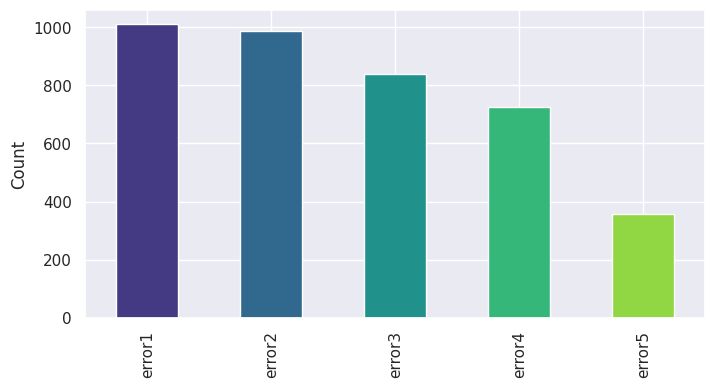

In [71]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))

error_counts = errors['errorID'].value_counts()
color_palette = sns.color_palette("viridis", len(error_counts))

errors['errorID'].value_counts().plot(kind='bar', color=color_palette)
plt.ylabel('Count')

Displaying errors per machine

In [101]:
machine_error_count= errors.groupby(["machineID","errorID"]).count()
machine_error_count

machine_error_count = machine_error_count.reset_index()
machine_error_count['error_count'] = machine_error_count['datetime']
machine_error_count = machine_error_count[['machineID', 'errorID', 'error_count']]

Displaying Count of Errors per Machine

In [107]:
import plotly.express as px
fig = px.bar(machine_error_count.reset_index(), x="machineID", y="error_count", color="errorID", title="Count of Errors per Machine",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"})
fig.show()

**EDA on Failures**

In [76]:
# Counting the number of records in failures
len(failures.index)

761

In [ ]:
# Checking data type in failures
failures['datetime'].dtype()

In [74]:
# Converting object to datetime
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

In [131]:
failures.describe

<bound method NDFrame.describe of                datetime  machineID failure
0   2015-01-05 06:00:00          1   comp4
1   2015-03-06 06:00:00          1   comp1
2   2015-04-20 06:00:00          1   comp2
3   2015-06-19 06:00:00          1   comp4
4   2015-09-02 06:00:00          1   comp4
..                  ...        ...     ...
756 2015-11-29 06:00:00         99   comp3
757 2015-12-14 06:00:00         99   comp4
758 2015-02-12 06:00:00        100   comp1
759 2015-09-10 06:00:00        100   comp1
760 2015-12-09 06:00:00        100   comp2

[761 rows x 3 columns]>

Displaying Count of different failure types

<ipython-input-75-c3e5b85c27cb>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



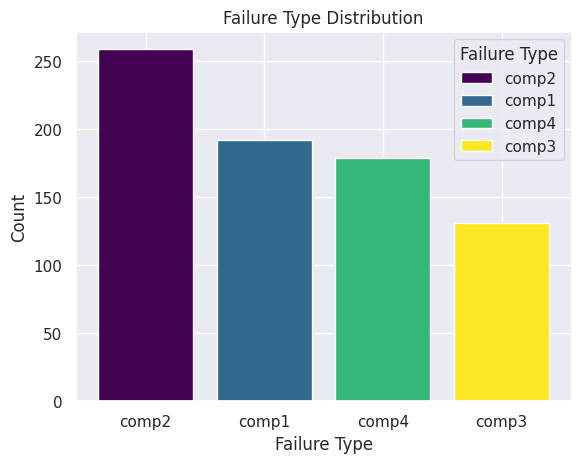

In [75]:
failure_counts = failures['failure'].value_counts()
colors = plt.cm.get_cmap('viridis', len(failure_counts))
bars = plt.bar(failure_counts.index, failure_counts, color=colors(np.arange(len(failure_counts))))
plt.legend(bars, failure_counts.index, title='Failure Type')

plt.title('Failure Type Distribution')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

**EDA on Machines**

In [78]:
len(machines.index)

100

In [79]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [132]:
machines.describe

<bound method NDFrame.describe of     machineID   model  age
0           1  model3   18
1           2  model4    7
2           3  model3    8
3           4  model3    7
4           5  model3    2
..        ...     ...  ...
95         96  model2   10
96         97  model2   14
97         98  model2   20
98         99  model1   14
99        100  model4    5

[100 rows x 3 columns]>

In [82]:
machines['model'] = machines['model'].astype('object')

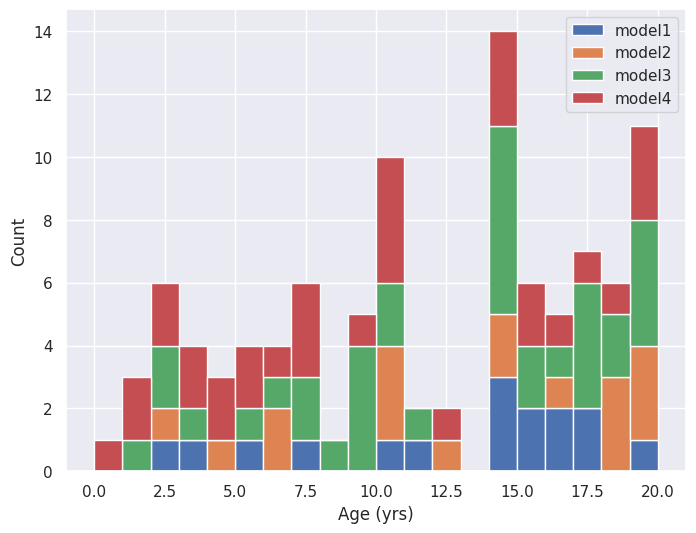

In [83]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [134]:
import plotly.express as px

fig = px.histogram(machines, x='age', color='model', barmode='stack',
                   title='Machine Age Distribution', template='plotly_dark',
                   labels={'age': 'Age', 'model': 'Model'},
                   category_orders={'model': ['model1', 'model2', 'model3', 'model4']})
fig.show()

**EDA on Maintanance**

In [122]:
len(maint)

3286

In [124]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [133]:
maint.describe

<bound method NDFrame.describe of                  datetime  machineID   comp
0     2014-06-01 06:00:00          1  comp2
1     2014-07-16 06:00:00          1  comp4
2     2014-07-31 06:00:00          1  comp3
3     2014-12-13 06:00:00          1  comp1
4     2015-01-05 06:00:00          1  comp4
...                   ...        ...    ...
3281  2015-10-10 06:00:00        100  comp3
3282  2015-10-25 06:00:00        100  comp4
3283  2015-11-09 06:00:00        100  comp4
3284  2015-12-09 06:00:00        100  comp2
3285  2015-12-24 06:00:00        100  comp2

[3286 rows x 3 columns]>

Displaying number of maintanance in different components

Text(0, 0.5, 'Count')

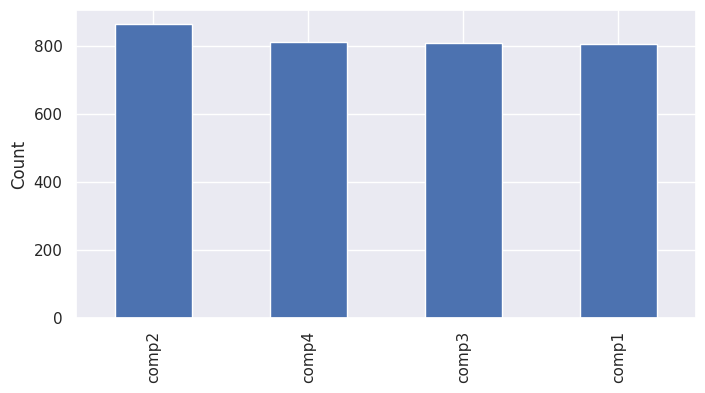

In [126]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

**EDA on Telemetry**

In [116]:
len(telemetry)

876100

In [118]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

In [119]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


Displaying volt for machineID = 1 between 01/01/15 to 02/01/15

Text(0, 0.5, 'voltage')

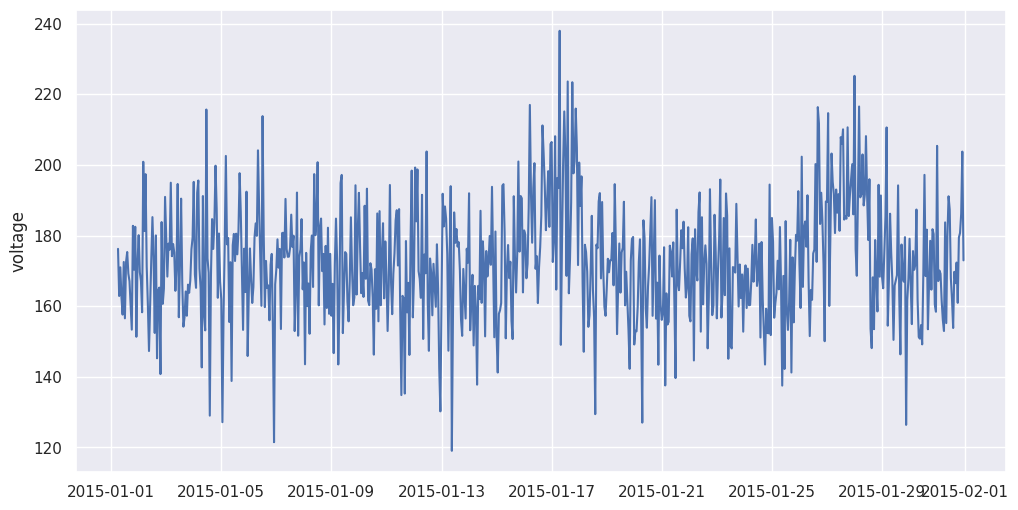

In [120]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

In [135]:
machine_error_count= errors.groupby(["machineID","errorID"]).count()
machine_error_count

machine_error_count = machine_error_count.reset_index()
machine_error_count['error_count'] = machine_error_count['datetime']
machine_error_count = machine_error_count[['machineID', 'errorID', 'error_count']]

In [136]:
machine_error_count[machine_error_count["machineID"]==23]

,machineID,errorID,error_count
108,23,error1,8
109,23,error2,9
110,23,error3,6
111,23,error4,6
112,23,error5,8


In [139]:
import plotly.express as px

fig = px.bar(machine_error_count.reset_index(), x="machineID", y="error_count", color="errorID", title="Count of Errors per Machine",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"})
fig.show()